## Сборный проект №1. Исследование известных игровых платформ и игр
### Описание проекта

В ходе проекта необходимо провести исследование опыта известных платформ и игр. Для анализа имеется информация об играх и продажах в Европе (EU), Северной Америке (NA) и России (RU). В результате проекта нужно принять решение, какую игру следует разработать.

### Цели проекта
* Провести предобработку данных
* Провести исследовательский анализ данных
* Составить портрет пользователя для каждого региона
* Проверить гипотезы
* Написать выводы по проекту

------

## Этап 1. Предобработка данных
### Общая информация о данных

Импортируем необходимые модули и библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

Прочитаем файлы *games.csv* и *rating.csv* и сохраним их в переменных `data_games` и `data_rating` соответственно.

In [51]:
data_games = pd.read_csv('/datasets/games.csv')

In [52]:
data_rating = pd.read_csv('/datasets/rating.csv')

Выведем на экран первые 10 строк таблиц `data_games` и `data_rating` и общую информацию о данных.

In [53]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [54]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [55]:
data_rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [56]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


В данных имеются пропуски и некорректные типы данных, например, в столбцах *'Year_of_Release'* и *'Critic_Score'*. Пропуски в столбцах *'Name'* и *'Year_of_Release'* возникли, скорее всего, в результате ошибок в сборе информации, либо выгрузке данных, так как такая информация у игр должна быть точно. 

Пропуски в столбцах *'Critic_Score'* и *'User_Score'* скорее всего означают, что на данные игры просто отсутствуют отзывы, либо это опять же ошибки в сборе информации, загрузке / выгрузке данных.

Пропуски в столбце *'Rating'* означают, скорее всего, ошибки при сборе информации и загрузке / выгрузке данных, так как их очень много, и мало верится, что у такого количества игр нет рейтинка возрастной категории. В этом случае необходимо отправить запрос на уточнение данных специалистам, которые предоставили данные.

Для удобства работы поменяем названия столобцов.

In [57]:
new_columns = ['name', 'platform', 'year_of_release', 'genre', 'north_america', 'europe', 'russia', 'other', 'critic_score', 
               'user_score', 'rating']

In [58]:
data_games.set_axis (new_columns, axis='columns', inplace=True)

Посчитаем количество продаж во всех регионах, добавим новый столбец *'total_sales'*.

In [59]:
data_games['total_sales'] = data_games['north_america'] + data_games['europe'] + data_games['russia'] + data_games['other']

------

### Работа с пропусками и приведение данных к нужным типам

Заменим пропуски в столбцах *'name'*, *'genre'* и *'rating'* на *'unknown'*.

In [60]:
data_games['name'] = data_games['name'].fillna('unknown')

In [61]:
data_games['genre'] = data_games['genre'].fillna('unknown')

In [62]:
data_games['rating'] = data_games['rating'].fillna('unknown')

По поводу пропусков в значениях столбца *'year_of_release'* замена медианой или средним выглядит не совсем корректно. Учитывая относительно небольшое количество пропусков удалим из данных строки с пропусками.

In [63]:
data_games.dropna(subset = ['year_of_release'], inplace = True)

Поменяем тип данных на целочисленный.

In [64]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

Займемся пропусками в значениях столбца *'critic_score'*. Для начала посмотрим на уникальные значения столбца.

In [65]:
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заменим пропуски на значение 0 и поменяем тип данных на целочисленный.

In [66]:
data_games['critic_score'] = data_games['critic_score'].fillna(0)

In [67]:
data_games['critic_score'] = data_games['critic_score'].astype('int')

Займемся пропусками в значениях столбца *'user_score'*. Для начала посмотрим на уникальные значения столбца.

In [68]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Замениим пропуски и значения 'tbd' на '0'.

In [69]:
data_games['user_score'] = data_games['user_score'].fillna('0')

In [70]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = '0'

Для перевода строковых значений в числа используем метод `to_numeric()`.

In [71]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'])

Посмотрим, что получилось, выведем первые 10 строк и информацию о данных таблицы `data_games` на экран.

In [72]:
data_games.head(10)

,name,platform,year_of_release,genre,north_america,europe,russia,other,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,unknown,28.31


In [73]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 12 columns):
name               16450 non-null object
platform           16450 non-null object
year_of_release    16450 non-null int64
genre              16450 non-null object
north_america      16450 non-null float64
europe             16450 non-null float64
russia             16450 non-null float64
other              16450 non-null float64
critic_score       16450 non-null int64
user_score         16450 non-null float64
rating             16450 non-null object
total_sales        16450 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


Проверим данные на дубликаты.

In [74]:
data_games.duplicated().sum()

0

Итак, пропусков нет, типы данных приведены, дубликатов нет, данные готовы для анализа.

------

## Этап 2. Исследовательский анализ данных

Построим гистограмму распределения по годам релиза. Настроим число столбцов так, чтобы один столбец означал один год.

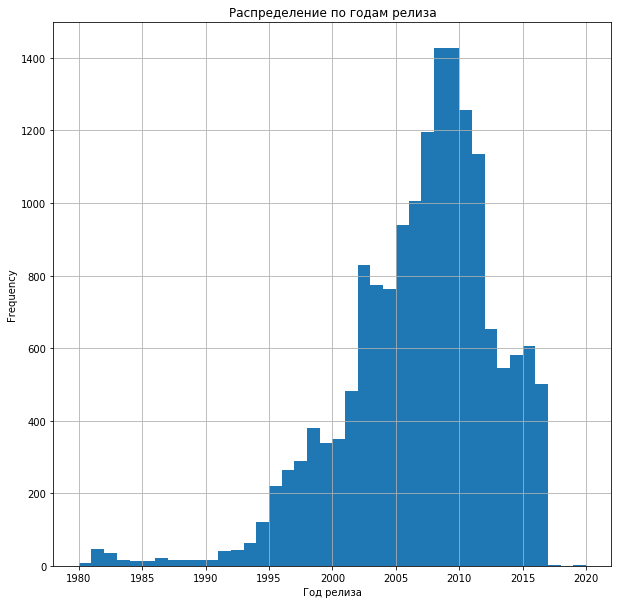

In [75]:
data_games['year_of_release'].plot(kind='hist', bins=40, grid=True, figsize=(10,10))
plt.title('Распределение по годам релиза');
plt.xlabel('Год релиза');

* Начиная с 90-х годов наблюдается стремительный рост разработки игр. Самое большое количество выпущенных игр приходится на период с 2006 по 2011 годы. Затем, судя по данным, происходи резкий спад количества релизов, а, например, в период с 2017 по настоящее время релизов почти нет, что выглядит очень странным, видимо информации об играх, выпущенных в последние 2 года, нет в данных.

Построим гистограммы распределения по годам релиза для игр с отзывом и без отзыва.

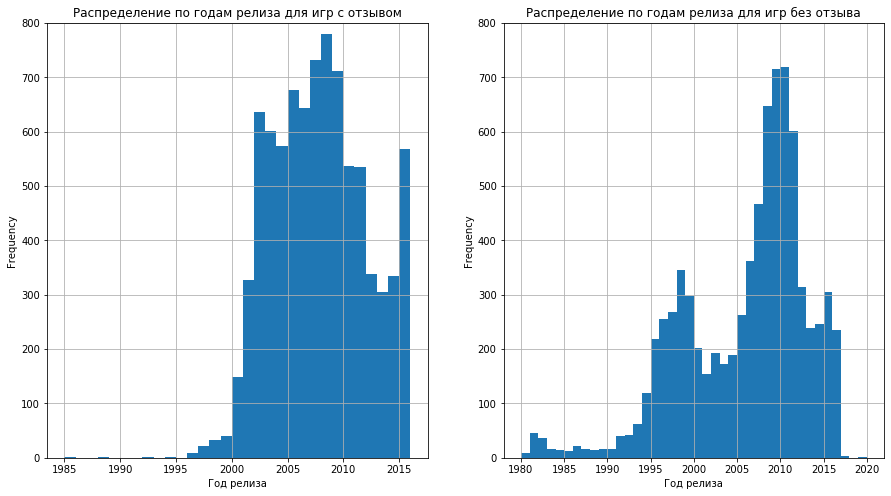

In [76]:
(data_games
 # выбираем срез с играми, для которых етсь оценка критика или оценка пользователя 
 .query('critic_score != 0 or user_score != 0.0')['year_of_release']
 # настриваем число столбцов, чтобы один столбец соответствовал одному году
 # отображаем графики в одну строку и настраиваем одинаковое ограничение по оси ординат
 .plot(kind='hist', bins=31, grid=True, figsize=(15,8), ylim=(0,800), ax = plt.subplot(1,2,1))
)
plt.title('Распределение по годам релиза для игр с отзывом');
plt.xlabel('Год релиза');
(data_games
 # выбираем срез с играми, у которых нет оценок
 .query('critic_score == 0 and user_score == 0.0')['year_of_release']
 .plot(kind='hist', bins=40, grid=True, figsize=(15,8), ylim=(0,800), ax = plt.subplot(1,2,2))
)
plt.title('Распределение по годам релиза для игр без отзыва');
plt.xlabel('Год релиза');

* Сравнивая данные распределения, можно сказать, что на период с 1990 по 2000 года большая часть выпускаемых игр была без каких-либо оценок. Обратное можно сказать про период с 2000 по 2007 годы, большая часть выпущенных игр была с отзывами. Затем, насколько это можно судить по гистограммам, количество игр с отзывом и без примерно одинаковое.

Построим график продаж по каждому году. Для наглядности используем столбчатый график. Величина каждого столбца будет состоять из суммы продаж в каждом регионе. 

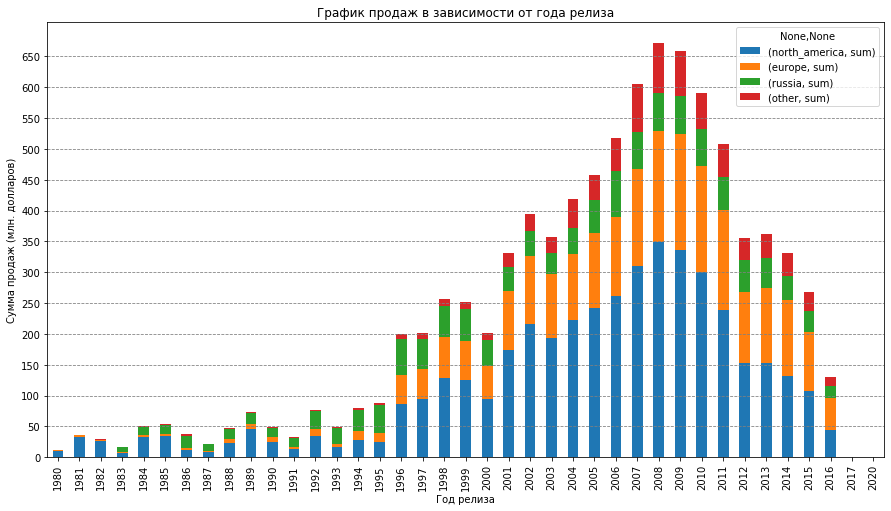

In [77]:
(data_games
 # группируем данные по году релиза и с помощью метода agg() применяем к значениям столбцов регионов функцию sum
 .groupby('year_of_release').agg({'north_america':['sum'],'europe':['sum'], 'russia':['sum'],'other':['sum']})
 # для пропорционального отображения 4 значений таблицы одном столбике применяем атрибут stacked=True
 .plot(kind='bar', stacked=True, figsize=(15,8))
)
plt.title('График продаж в зависимости от года релиза');
# меняем стиль отображения сетки
plt.grid(axis = 'y', color ='gray', linestyle='--')
plt.ylabel('Сумма продаж (млн. долларов)');
# добавляем необходимые деления на оси ординат
plt.yticks(range(0,700,50));
plt.xlabel('Год релиза');

* Продажи игр начинают расти начиная с 1996 года. Максимум продаж приходится на 2008 и 2009 годы, суммарные продажи игр - свыше 650 млн. долларов. Затем продажи игр падают до 2016 года. За последующие годы в выборке нет информации. Судя по графику, большая часть игр продается в Северной Америке и Европе, причем в Северной Америке в среднем в полтора - два раза больше, чем в Европе.

Построим ящик с усами по глобальным продажам.

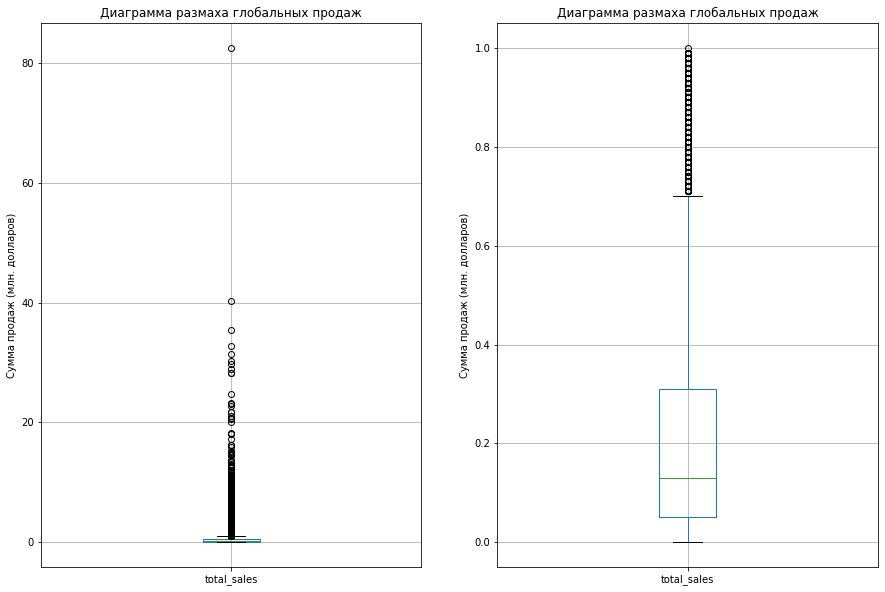

count    16450.000000
mean         0.535996
std          1.558590
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


In [78]:
fig = plt.figure(figsize=(15,10))
data_games.boxplot(column=['total_sales'], ax = plt.subplot(1,2,1))
plt.title('Диаграмма размаха глобальных продаж');
plt.ylabel('Сумма продаж (млн. долларов)');
(data_games
 .query('total_sales < 1')
 .boxplot(column=['total_sales'], ax = plt.subplot(1,2,2))
)
plt.title('Диаграмма размаха глобальных продаж');
plt.ylabel('Сумма продаж (млн. долларов)');
plt.show()
print(data_games['total_sales'].describe())

Интересно посмотреть, какую долю составляют от общего числа игр, игры сумма глобальных продаж которых превысила 1, 5 и 10 млн. долларов.

In [95]:
games_after_1 = data_games.query('total_sales > 1')['name'].count()
games_before_1 = data_games.query('total_sales <= 1')['name'].count()
ratio_1 = games_after_1 / games_before_1
print('Доля игр с глобальными продажами более 1 млн. долларов - {:.0%}'.format(ratio_1))
games_after_5 = data_games.query('total_sales > 5')['name'].count()
games_before_5 = data_games.query('total_sales <= 5')['name'].count()
ratio_5 = games_after_5 / games_before_5
print('Доля игр с глобальными продажами более 5 млн. долларов - {:.2%}'.format(ratio_5))
games_after_10 = data_games.query('total_sales > 10')['name'].count()
games_before_10 = data_games.query('total_sales <= 10')['name'].count()
ratio_10 = games_after_10 / games_before_10
print('Доля игр с глобальными продажами более 10 млн. долларов - {:.2%}'.format(ratio_10))


Доля игр с глобальными продажами более 1 млн. долларов - 14%
Доля игр с глобальными продажами более 5 млн. долларов - 1.27%
Доля игр с глобальными продажами более 10 млн. долларов - 0.38%


После построения диаграммы размаха по глобальным продажам оказалось, что произвести оценку статистических значений продаж по такому графику невозможно. Был построен еще один график с условием, что сумма глобальных продаж игры меньше 1 млн. долларов, также выведена информация о значимых статистических характеристиках значений глобальных продаж.
* Диапазон значений глобальных продаж игр от 0 до 700 тыс. долларов. Межквартильный размах - от 60 до 470 тыс. долларов. Медиана 170 тыс. долларов. Эта информация о типичных выпускаемых играх. Достаточно много игр с продажами более 1 млн. долларов (14 % от общего числа продаж)

Узнаем, на какой платформе было выпущено больше всего игр.

In [80]:
(data_games
 .pivot_table(index='platform', values='name', aggfunc='count')
 .sort_values('name', ascending=False)
 .head()
)

,name
platform,
PS2,2127
DS,2122
PS3,1306
Wii,1286
X360,1232


* Самыми распространенными платформами для игр являются PlayStation 2 и Nintendo DS Lite.

Определим самый распространенный игровой жанр.

In [81]:
(data_games
 .pivot_table(index='genre', values='name', aggfunc='count')
 .sort_values('name', ascending=False)
 .head(10)
)

,name
genre,
Action,3308
Sports,2306
Misc,1721
Role-Playing,1483
Shooter,1296
Adventure,1293
Racing,1226
Platform,878
Simulation,858


* Самым распространенным игровым жанром является "Action".

Найдем игры с наибольшей и наименьшей оценкой от пользователей.

In [82]:
(data_games
 .loc[:,['name', 'genre', 'platform', 'user_score']]
 .sort_values('user_score', ascending=False)
 .head(10)
)

,name,genre,platform,user_score
14414,Breath of Fire III,Role-Playing,PSP,9.7
3417,Harvest Moon: Friends of Mineral Town,Simulation,GBA,9.6
8976,Boktai: The Sun is in Your Hand,Role-Playing,GBA,9.6
16550,Wade Hixton's Counter Punch,Sports,GBA,9.5
1645,Golden Sun: The Lost Age,Role-Playing,GBA,9.5
16631,Karnaaj Rally,Racing,GBA,9.5
10106,Cory in the House,Action,DS,9.5
5920,MLB SlugFest Loaded,Sports,PS2,9.5
13289,Rock 'N Roll Racing,Racing,GBA,9.4
712,Paper Mario: The Thousand-Year Door,Role-Playing,GC,9.4


In [83]:
(data_games
 .query('user_score != 0.0')
 .loc[:,['name', 'genre', 'platform', 'user_score']]
 .sort_values('user_score')
 .head(10)
)

,name,genre,platform,user_score
13683,Myth Makers: Trixie in Toyland,Platform,Wii,0.2
9971,Madden NFL 17,Sports,PS3,0.2
5764,Happy Feet,Action,DS,0.3
13381,Billy the Wizard: Rocket Broomstick Racing,Racing,Wii,0.3
10263,Charlie and the Chocolate Factory,Adventure,XB,0.5
9148,Power Gig: Rise of the SixString,Misc,PS3,0.5
15219,Kawasaki Jet Ski,Racing,Wii,0.6
10483,Thrillville: Off the Rails,Strategy,PSP,0.6
13427,Pool Party,Sports,Wii,0.7
8266,Madden NFL 17,Sports,X360,0.7


Найдем игры с наибольшей и наименьшей оценкой от критиков.

In [84]:
(data_games
 .loc[:,['name', 'genre', 'platform', 'critic_score']]
 .sort_values('critic_score', ascending=False)
 .head(10)
)

,name,genre,platform,critic_score
57,Grand Theft Auto IV,Action,PS3,98
5350,SoulCalibur,Fighting,DC,98
51,Grand Theft Auto IV,Action,X360,98
227,Tony Hawk's Pro Skater 2,Sports,PS,98
16,Grand Theft Auto V,Action,PS3,97
38,Grand Theft Auto III,Action,PS2,97
517,Metroid Prime,Shooter,GC,97
97,Super Mario Galaxy 2,Platform,Wii,97
249,Tony Hawk's Pro Skater 3,Sports,PS2,97
23,Grand Theft Auto V,Action,X360,97


In [85]:
(data_games
 .query('critic_score != 0')
 .loc[:,['name', 'genre', 'platform', 'critic_score']]
 .sort_values('critic_score')
 .head(10)
)

,name,genre,platform,critic_score
13690,Ride to Hell,Racing,PS3,13
10663,Leisure Suit Larry: Box Office Bust,Adventure,PS3,17
10016,Rugby 15,Sports,PS4,19
15345,Balls of Fury,Sports,Wii,19
12132,Anubis II,Platform,Wii,19
9106,Chicken Shoot,Action,DS,19
12823,Ride to Hell,Racing,X360,19
7219,Nickelodeon Party Blast,Misc,XB,19
11223,Rugby 15,Sports,XOne,20
1050,Deal or No Deal,Misc,DS,20


Выводы по играм с наибольшими и наименьшими оценками будут в выводах проекта.

Оценим корреляцию между оценками критиков и пользовательскими оценками.

In [86]:
data_games.query('user_score != 0.0')['user_score'].corr(data_games.query('critic_score != 0')['critic_score'])

0.5796706281932222

* Между оценками критиков и пользовательскими оценками существует заметная корреляция.

------

## Этап 3. Составление портрета пользователя для каждого региона

Найдем топ-5 предпочтительных жанров игр для каждого региона. Для выделения сегмента для исследования предпочтительных жанров будем использовать межквартильный размах значений продаж игр для каждого региона. Для того, чтобы найти самые известные жанры используем метод `value_counts()`. Для автоматизации расчетов применим цикл.

In [87]:
for name in ['north_america', 'europe', 'russia']:    
    print('Top genres in', name.upper())
    print(data_games
         .loc[(data_games.loc[:, name] < data_games[name].quantile(0.75)) & 
              (data_games.loc[:, name] > data_games[name].quantile(0.25))]['genre']
         .value_counts()
         .head()
         )
    print()

Top genres in NORTH_AMERICA
Action     1658
Sports     1130
Misc        817
Racing      744
Shooter     665
Name: genre, dtype: int64

Top genres in EUROPE
Action     1421
Sports      925
Racing      604
Shooter     565
Misc        558
Name: genre, dtype: int64

Top genres in RUSSIA
Action          435
Adventure       424
Role-Playing    205
Misc            174
Shooter         158
Name: genre, dtype: int64



Исследуем, в какие года пользователи покупали больше всего игр. Делаем аналогично нахождению топ-5 жанров игр.

In [88]:
for name in ['north_america', 'europe', 'russia']:    
    print(name.upper())
    print(data_games
         .loc[(data_games.loc[:, name] < data_games[name].quantile(0.75)) & 
              (data_games.loc[:, name] > data_games[name].quantile(0.25))]['year_of_release']
         .value_counts()
         .head()
         )
    print()

NORTH_AMERICA
2009    734
2008    700
2010    610
2005    593
2002    545
Name: year_of_release, dtype: int64

EUROPE
2005    570
2002    507
2003    465
2011    458
2004    439
Name: year_of_release, dtype: int64

RUSSIA
2008    226
2010    218
2007    191
2009    170
2006    162
Name: year_of_release, dtype: int64



Найдем топ-5 предпочтительных платформ игр для каждого региона. Делаем аналогично нахождению топ-5 жанров игр.

In [89]:
for name in ['north_america', 'europe', 'russia']:    
    print('Top platforms in', name.upper())
    print(data_games
         .loc[(data_games.loc[:, name] < data_games[name].quantile(0.75)) & 
              (data_games.loc[:, name] > data_games[name].quantile(0.25))]['platform']
         .value_counts()
         .head()
         )
    print()

Top platforms in NORTH_AMERICA
DS      1106
PS2     1057
Wii      701
PS       652
X360     606
Name: platform, dtype: int64

Top platforms in EUROPE
PS2    936
PC     668
XB     602
PS     550
GBA    511
Name: platform, dtype: int64

Top platforms in RUSSIA
PSP     332
X360    272
PS2     270
PS3     257
DS      236
Name: platform, dtype: int64



Необходимо посчитать для каждого региона какой рейтинг ESRB встречается чаще всего. Для этого применим метод `value_counts()`. Для выборки сделаем срез по значениям межквартильного размаха продаж игр в интересуемом регионе. Значения межквартильного размаха продаж игр для каждого региона это своего рода сегмент для подсчета значений рейтинга ESRB в каждом регионе. Также уберем значения с неизвестным рейтингом. Для автоматизации расчетов применим цикл.

In [90]:
for name in ['north_america', 'europe', 'russia']:
    print('Rating ESRB', name.upper())
    print(data_games
         .loc[(data_games.loc[:, name] < data_games[name].quantile(0.75)) & 
              (data_games.loc[:, name] > data_games[name].quantile(0.25)) & 
              (data_games.loc[:, 'rating'] != 'unknown')]['rating']
         .value_counts()
         .head()
         )
    print()

Rating ESRB NORTH_AMERICA
E       2462
T       1769
E10+     905
M        813
EC         5
Name: rating, dtype: int64

Rating ESRB EUROPE
E       1742
T       1527
M        712
E10+     606
K-A        2
Name: rating, dtype: int64

Rating ESRB RUSSIA
T       278
M       208
E       169
E10+    103
Name: rating, dtype: int64



Выводы по этапу исследования будут в конце проекта.

------

## Этап 4. Проверка гипотез

Проверим гипотезу: средний пользовательский рейтинг платформ PS2 и PS3 одинаковый.

* **Нулевая гипотеза** - средние пользовательские рейтинги платформ PS2 и PS3 **равны** между собой.
* **Альтернативная гипотеза** - средние пользовательские рейтинги платформ PS2 и PS3 **не равны** между собой.

Создадим необходимые для проверки гипотезы выборки и посчитаем их дисперсии.

In [91]:
data_games_ps2 = data_games.query('platform == "PS2"')['user_score']
data_games_ps3 = data_games.query('platform == "PS3"')['user_score']
print('Дисперсия выборки для платформы PS2', np.var(data_games_ps2))
print('Дисперсия выборки для платформы PS3', np.var(data_games_ps3))

Дисперсия выборки для платформы PS2 15.20365814944711
Дисперсия выборки для платформы PS3 11.552679475573921


In [92]:
# Примем общепринятое пороговое значение 5%
alpha = .05

# Для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var)
# аргумент equal_var приравняем False, так как дисперсии выборок не равны
results = st.ttest_ind(data_games_ps2, data_games_ps3, equal_var = False)
print('p-значение:', results.pvalue)

# прописываем условия вывода результата проверки гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.656783000071229
Не получилось отвергнуть нулевую гипотезу


* Результат: **не отвергаем** нулевую гипотезу.

Проверим гипотезу: средний пользовательский рейтинг жанров Action и Sports различается.
* **Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports **равны** между собой.
* **Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports **не равны** между собой.

Создадим необходимые для проверки гипотезы выборки и посчитаем их дисперсии.

In [93]:
data_games_action = data_games.query('genre == "Action"')['user_score']
data_games_sports = data_games.query('genre == "Sports"')['user_score']
print('Дисперсия выборки для жанра Action', np.var(data_games_action))
print('Дисперсия выборки для жанра Sports', np.var(data_games_sports))

Дисперсия выборки для жанра Action 13.462667287101437
Дисперсия выборки для жанра Sports 13.26199112726031


In [94]:
# Примем общепринятое пороговое значение 5%
alpha = .05

# Для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var)
# аргумент equal_var приравняем False, так как дисперсии выборок не равны
results = st.ttest_ind(data_games_action, data_games_sports, equal_var = False)
print('p-значение:', results.pvalue)

# прописываем условия вывода результата проверки гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.708465885411047e-09
Отвергаем нулевую гипотезу


* Результат: **отвергаем** нулевую гипотезу.

## Результаты работы

### Исследовательский анализ данных

* Анализируя гистограмму распределения по годам релиза можно сказать, что начиная с 90-х годов наблюдается стремительный рост разработки игр. Самое большое количество выпущенных игр приходится на период с 2006 по 2011 годы. Затем, судя по данным, происходи резкий спад количества релизов, а, например, в период с 2017 по настоящее время релизов почти нет, что выглядит очень странным, видимо информации об играх, выпущенных за последние 2 года, нет в данных.

* Сравнивая гистограммы распределения по годам релиза для игр с отзывом и без, можно сказать, что на период с 1990 по 2000 года большая часть выпускаемых игр была без каких-либо оценок. Обратное можно сказать про период с 2000 по 2007 годы, большая часть выпущенных игр была с отзывами. Затем, насколько это можно судить по гистограммам, количество игр с отзывом и без примерно одинаковое.

* Судя по графику продаж по каждому году, продажи игр активно растут, начиная с 1996 года. Максимум продаж приходится на 2008 и 2009 годы, суммарные продажи игр - свыше 650 млн. долларов. Затем продажи игр падают до 2016 года. За последующие годы в выборке нет информации. Судя по графику, большая часть игр продается в Северной Америке и Европе, причем в Северной Америке в среднем в полтора - два раза больше, чем в Европе.

* Анализируя диаграмму размаха по глобальным продажам, можно сказать, что диапазон значений глобальных продаж игр от 0 до 700 тыс. долларов. Межквартильный размах - от 60 до 470 тыс. долларов. Медиана 170 тыс. долларов. Эта информация о типичных выпускаемых играх. Также были посчитаны доли игр, глобальные продажи которых более 1, 5 и 10 млн. долларов.

| Глобальные продажи     | Доля (%) |
| :---:                  | :---:    |
| более 1 млн. долларов  | 14       |
| более 5 млн. долларов  | 1.27     |
| более 10 млн. долларов | 0.38     |

* Самыми распространенными платформами для игр являются PlayStation 2 и Nintendo DS Lite.

* Самым распространенным игровым жанром является "Action". Затем идет жанр "Sports".

* Топ-5 игр с наибольшей и наименьшей оценкой от пользователей. Выведем результаты в виде таблицы.

Оценка пользователей | Название игры | Жанр | Платформа
:---: |---------------|------| :---:
**Наибольшая** | | | 
 | Breath of Fire III | Role-Playing | PSP
 | Harvest Moon: Friends of Mineral Town | Simulation | GBA
| Boktai: The Sun is in Your Hand | Role-Playing | GBA
 | Wade Hixton's Counter Punch | Sports | GBA
 | Golden Sun: The Lost Age | Role-Playing | GBA
**Наименьшая**  | | |
  | Myth Makers: Trixie in Toyland | Platform | Wii
 | Madden NFL 17 | Sports | PS3
| Happy Feet | Action | DS
           | Billy the Wizard: Rocket Broomstick Racing | Racing | Wii
 | Charlie and the Chocolate Factory | Adventure | XB

Пользователи больше всего оценили ролевые игры, спортивные игры и симуляции на портативных платформах.

* Топ-5 игр с наибольшей и наименьшей оценкой от критиков. Выведем результаты в виде таблицы.

Оценка пользователей | Название игры | Жанр | Платформа
:---: |---------------|------| :---: 
**Наибольшая** | | |
 | Grand Theft Auto IV | Action | PS3
 | SoulCalibur | Fighting | DC
| Grand Theft Auto IV | Action | X360
 | Tony Hawk's Pro Skater 2 | Sports | PS
 | Grand Theft Auto V | Action | PS3
 **Наименьшая**  | | |
  | Ride to Hell | Racing | PS3
 | Leisure Suit Larry: Box Office Bust | Adventure | PS3
| Rugby 15 | Sports | PS4
           | Balls of Fury | Sports | Wii
 | Anubis II | Platform | Wii

Критики больше всего оценили игры жанров Action, Fighting и Sports на консолях.

* Корреляция между оценками критиков и пользовательскими оценками равна 0.58. Данные значения заметно коррелируют между собой.


### Портрет пользователя для каждого региона

Выведем результаты в виде таблицы.

Категория / Регион | Северная Америка | Европа | Россия
:---: | :---: | :---: | :---:
**топ-5 жанров** | | | 
 | Action | Action | Action
 | Sports | Sports | Adventure
 | Misc | Racing | Role-Playing
 | Racing | Shooter | Misc
 | Shooter | Misc | Shooter
**активные годы продаж** |  |  | 
  | 2009 | 2005 | 2008
  | 2008 | 2002 | 2010
  | 2010 | 2003 | 2007
 | 2005 | 2011 | 2009
 | 2002 | 2004 | 2006
 **топ-5 платформ** |  |  | 
  | DS | PS2 | PSP
 | PS2 | PC | X360
| Wii | XB | PS2
 | PS | PS | PS3
 | X360 | GBA | DS
 **рейтинг ESRB** | |  | 
  | E | E | T
 | T | T | M
| E10+ | M | E
 | M | E10+ | E10+
 | EC | - | -

* Проанализировав данную таблицу, можно сказать что жанры Action, Racing и Shooter уважают во всех регионах. В Северной Америке и Европе еще в почете жанр Sports. 
* Про продажи можно сказать, что в России и Северной Америке игры активнее продавались в конце первого десятилетия нашего века, в Европе - наоборот в начале.
* Во всех регионах наблюдается конкуренция между игровыми приставками и портативными игровыми консолями. Самыми топовыми платформами, судя по результатам, являются модификации Sony PlayStation.
* В Северной Америке и Европе большинстов игр с рейтингами "Для всех" и "Подросткам 13-19 лет". В России сначала рейтинг "Подросткам 13-19 лет", потом "От 17 лет", а затем "Для всех".

### Проверка гипотез

1. Проверялась гипотеза: средние пользовательские рейтинги платформ PS2 и PS3 **равны** между собой. В результате проверки эта гипотеза **не была отвергнута**.
2. Проверялась гипотеза: средние пользовательские рейтинги жанров Action и Sports **равны** между собой. В результате проверки эта гипотеза **была отвергнута**.

### Общие выводы по проекту

По результатам исследования известных игровых платформ и игр, разработчику игры можно дать следующие советы:
1. Акцентрировать разработку игры для пользователей Северной Америки и Европы, так как продажи игр там в разы больше.
2. Выбрать жанр игры Action или Sports в первую очередь, либо Racing или Shooter во вторую.
3. Выпустить первую версию игры для PS4, так как технологии развиваются, а самыми топовыми платформами судя по результатам являются модификации PlayStation. Затем можно подумать над версией игры для X360, для портативной платформы (Nintendo) или для персонального компьютера.
4. Постараться, чтобы игра имела рейтинг "E" или "T".
5. Быть талантливыми и иметь удачу, чтобы игра всем понравилась и в итоге била рекорды мировых продаж!

------